In [4]:
from pyforest import *
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from joblib import dump

In [5]:
data = pd.read_csv('recommending_topics.csv')

In [6]:
data.head()

,gender,Avg.Time,Score on Topic,DiscussionBoardEng,Comp1etedTopic,C1ass,Recommend
0,M,16,2,20,1,2,1
1,M,20,3,25,1,2,1
2,M,7,0,30,2,1,1
3,M,25,5,35,2,1,1
4,M,50,12,50,2,2,1


In [7]:
data.shape

(480, 7)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 7 columns):
gender                480 non-null object
Avg.Time              480 non-null int64
Score on Topic        480 non-null int64
DiscussionBoardEng    480 non-null int64
Comp1etedTopic        480 non-null int64
C1ass                 480 non-null int64
Recommend             480 non-null int64
dtypes: int64(6), object(1)
memory usage: 26.3+ KB


In [9]:
data.describe()

,Avg.Time,Score on Topic,DiscussionBoardEng,Comp1etedTopic,C1ass,Recommend
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.00000
mean,54.797917,37.918750,43.283333,1.391667,2.031250,1.18750
std,33.080007,26.611244,27.637735,0.488632,0.748738,0.39072
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000
25%,20.000000,14.000000,20.000000,1.000000,1.000000,1.00000
50%,65.000000,33.000000,39.000000,1.000000,2.000000,1.00000
75%,84.000000,58.000000,70.000000,2.000000,3.000000,1.00000
max,99.000000,98.000000,99.000000,2.000000,3.000000,2.00000


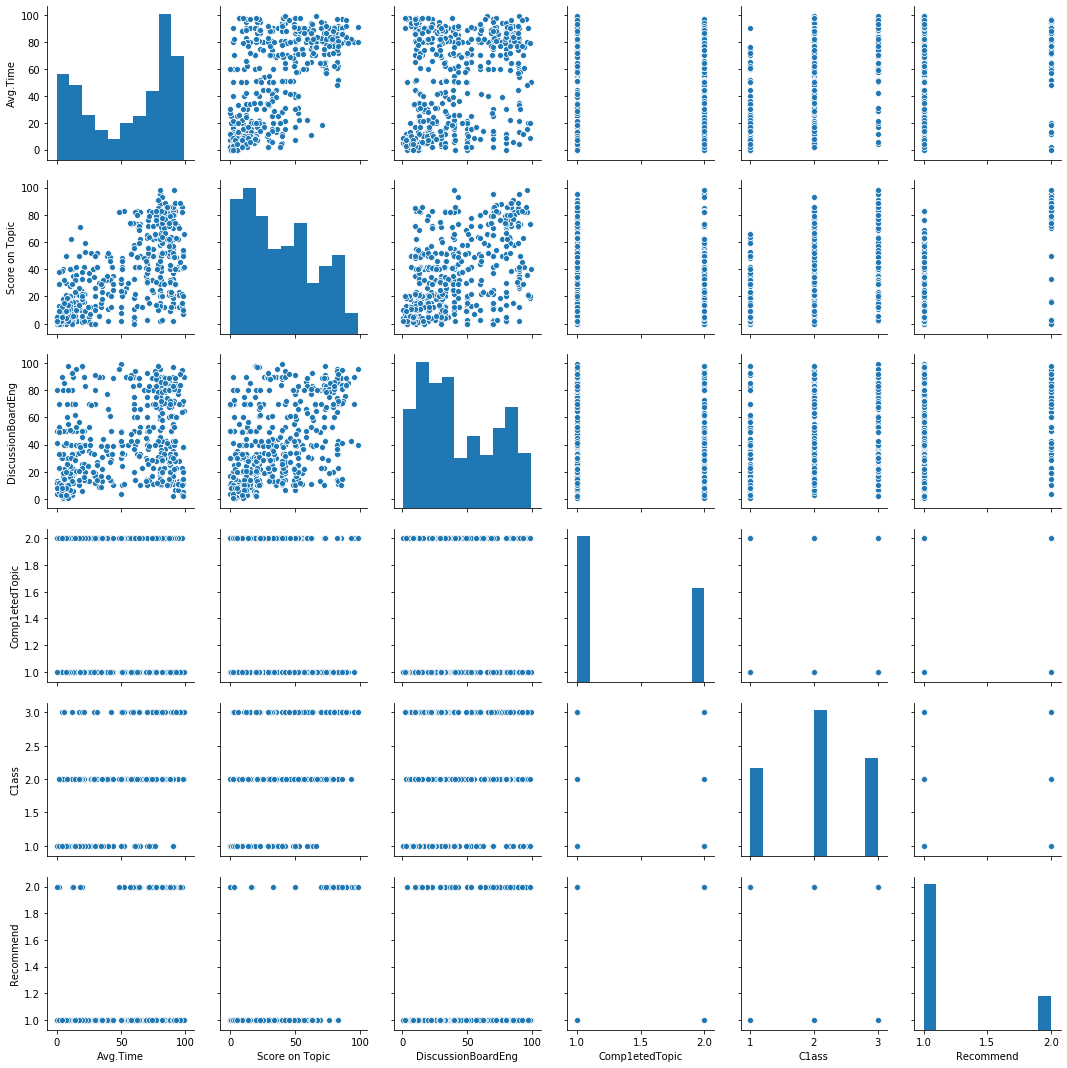

In [10]:
sns.pairplot(data)

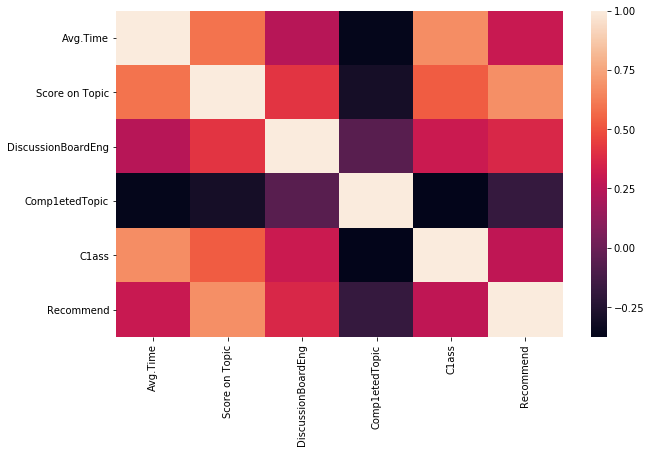

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr())

In [12]:
data.columns

Index(['gender', 'Avg.Time', 'Score on Topic', 'DiscussionBoardEng',
       'Comp1etedTopic', 'C1ass', 'Recommend'],
      dtype='object')

In [13]:
features = data[['Avg.Time', 'Score on Topic', 'DiscussionBoardEng',
       'Comp1etedTopic', 'C1ass']]


In [14]:
label= data[['Recommend']]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.1)

In [17]:
print(features_train.shape)

(432, 5)


In [18]:
print(label_test.shape)

(48, 1)


In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model = LogisticRegression()

In [21]:
model.fit(features_train,label_train)

C:\Users\Eugene Teddy Owusu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Eugene Teddy Owusu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
label_test.iloc[0]   #1 means Yes

Recommend    1
Name: 11, dtype: int64

In [23]:
model.predict(features_test)[0]

1

In [24]:
from sklearn.metrics  import classification_report, confusion_matrix

In [25]:
print(classification_report(label_test, model.predict(features_test)))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99        40
           2       1.00      0.88      0.93         8

    accuracy                           0.98        48
   macro avg       0.99      0.94      0.96        48
weighted avg       0.98      0.98      0.98        48



In [26]:
#save model here

In [27]:
dump(model, 'recommendation_model.joblib')

['recommendation_model.joblib']